In [1]:
import pandas as pd
import numpy as np
from scipy import fft, signal, interpolate
import matplotlib.pyplot as plt

 - https://stackoverflow.com/questions/72253966/have-i-applied-the-fourier-transformation-correctly-to-this-dataframe-exafs-x?noredirect=1#comment127701106_72253966
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
 - https://stackoverflow.com/questions/34428886/discrete-fourier-transformation-from-a-list-of-x-y-points/34432195#34432195
 - https://en.wikipedia.org/wiki/Spectral_density
 - https://en.wikipedia.org/wiki/Periodogram

In [2]:
raw = pd.read_csv("https://pastebin.com/raw/ucFekzc6", sep="\t", names=["k", "wchi"], header=0)
#raw.to_excel("Iron_XAFS.xlsx")

In [3]:
raw.shape

(495, 2)

In [4]:
raw = raw.drop_duplicates()

In [5]:
raw.shape

(454, 2)

In [6]:
raw["R"] = 1/raw["k"]
raw["chi"] = raw["wchi"]/raw["k"]**2

In [7]:
raw["chi"] = raw["chi"] - raw["chi"].mean()

In [8]:
raw = raw.iloc[1:, :]

In [9]:
raw

,k,wchi,R,chi
2,0.105415,-0.012242,9.486277,-1.103964
3,0.149080,-0.024168,6.707811,-1.089777
4,0.365170,-0.126450,2.738452,-0.950590
6,0.384235,-0.137404,2.602576,-0.933021
8,0.447240,-0.173260,2.235937,-0.868522
...,...,...,...,...
490,13.247159,0.194686,0.075488,-0.001216
491,13.267277,0.254071,0.075373,-0.000882
492,13.287363,0.334061,0.075259,-0.000433
493,13.307420,0.489103,0.075146,0.000436


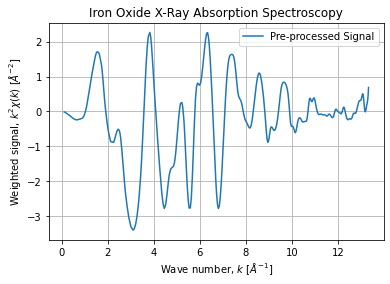

In [10]:
axe = raw.plot(x="k", y="wchi", label="Pre-processed Signal")
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Wave number, $k$ [$\AA^{-1}$]")
axe.set_ylabel(r"Weighted signal, $k^2 \chi(k)$ [$\AA^{-2}$]")
axe.grid()

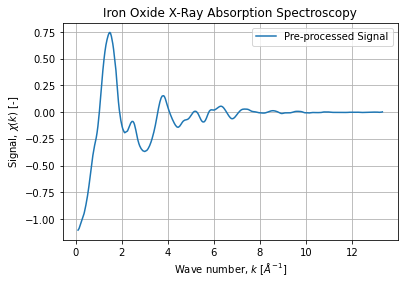

In [11]:
axe = raw.plot(x="k", y="chi", label="Pre-processed Signal")
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Wave number, $k$ [$\AA^{-1}$]")
axe.set_ylabel(r"Signal, $\chi(k)$ [-]")
axe.grid()

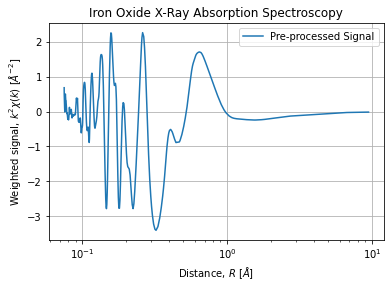

In [12]:
axe = raw.plot(x="R", y="wchi", label="Pre-processed Signal", logx=True)
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"Weighted signal, $k^2 \chi(k)$ [$\AA^{-2}$]")
axe.grid()

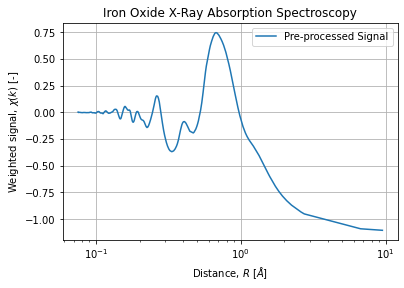

In [13]:
axe = raw.plot(x="R", y="chi", label="Pre-processed Signal", logx=True)
axe.set_title("Iron Oxide X-Ray Absorption Spectroscopy")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"Weighted signal, $\chi(k)$ [-]")
axe.grid()

In [14]:
N = 16384

In [15]:
k = np.linspace(raw["k"].min(), raw["k"].max(), N)

In [16]:
interpolant = interpolate.interp1d(raw["k"], raw["chi"])

In [17]:
chi = interpolant(k)

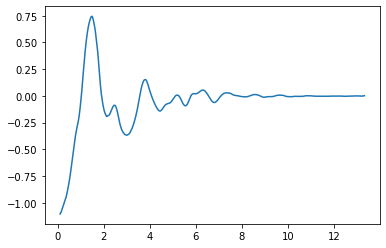

In [18]:
plt.plot(k, chi)

In [19]:
R = fft.fftfreq(N, np.diff(k)[0]/2)

In [20]:
Chi = fft.fft(chi)

(0.0, 10.0)

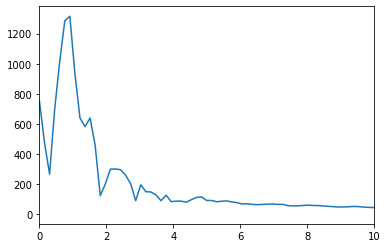

In [21]:
fig, axe = plt.subplots()
axe.plot(fft.fftshift(R)[N//2:], fft.fftshift(np.abs(Chi))[N//2:])
axe.set_xlim([0, 10])

In [22]:
f = np.linspace(1e-3, 25, 4096)

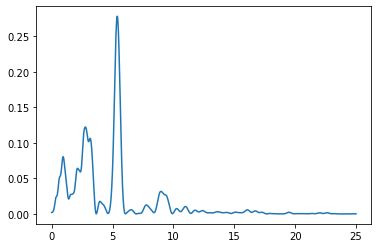

In [23]:
x = signal.lombscargle(raw["k"], raw["wchi"], freqs=f, normalize=True)
plt.plot(f, x)

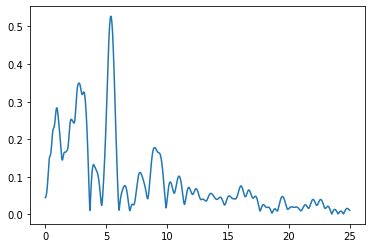

In [24]:
plt.plot(f, np.sqrt(x))

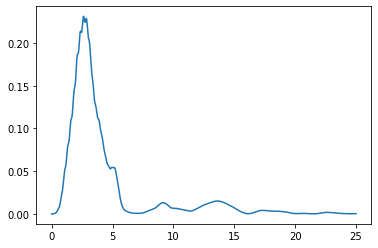

In [25]:
x = signal.lombscargle(raw["k"], raw["chi"], freqs=f, normalize=True)
axe = plt.plot(f, x)

(0.0, 30.0)

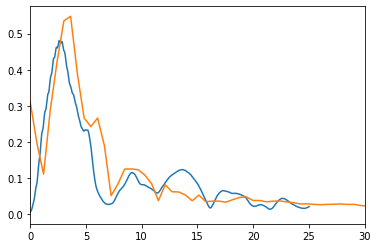

In [26]:
x = signal.lombscargle(raw["k"], raw["chi"], freqs=f, normalize=True)
fig, axe = plt.subplots()
axe.plot(f, np.sqrt(x))
axe.plot(fft.fftshift(R)[N//2:]*4, fft.fftshift(np.abs(Chi))[N//2:]/2400)
axe.set_xlim([0, 30])

(0.0, 30.0)

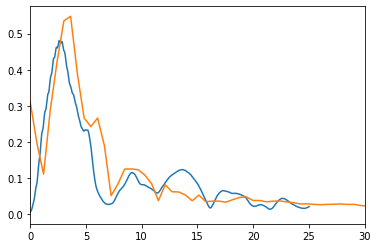

In [27]:
x = signal.lombscargle(raw["k"], raw["chi"], freqs=f, normalize=True)
fig, axe = plt.subplots()
axe.plot(f, np.sqrt(x))
axe.plot(fft.fftshift(R)[N//2:]*4, fft.fftshift(np.abs(Chi))[N//2:]/2400)
axe.set_xlim([0, 30])

In [59]:
R = np.linspace(raw["R"].min(), 5*raw["R"].max(), 4096)
X = signal.lombscargle(raw["k"], raw["chi"], freqs=R, normalize=True)
R2 = np.linspace(1e-3, 250, 4096)
X2 = signal.lombscargle(raw["k"], raw["chi"], freqs=R2, normalize=True)

(0.0, 25.0)

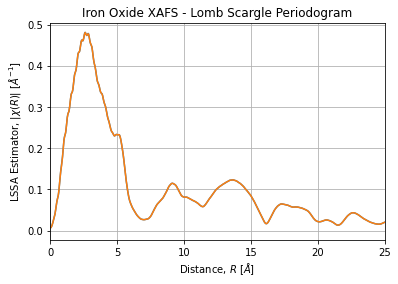

In [61]:
fig, axe = plt.subplots()
axe.plot(R, np.sqrt(X))
axe.plot(R2, np.sqrt(X2))
axe.set_title("Iron Oxide XAFS - Lomb Scargle Periodogram")
axe.set_xlabel(r"Distance, $R$ [$\AA$]")
axe.set_ylabel(r"LSSA Estimator, $|\chi(R)|$ [$\AA^{-1}$]")
axe.grid()
axe.set_xlim([0, 25])